# Machine Learning Project
### Fall 2023
## Predicting Hotel Reservation Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/hotel_bookings_image.png" 
  alt="Hotel Bookings" 
  width="800"
  height="650"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `bookings_df` data frame in this project. This data set contains information on over 5,000 reservations made at a U.S. hotel. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their hotel reservations and develop machine learning algorithms that will predict the likelihood of a customer canceling their reservation in the future.

## Hotel Bookings Data

The `bookings_df` data frame contains information about bookings (reservations) for a U.S. based hotel. 

The hotel is looking to see if it can determine the factors that lead to customers canceling their reservations and develop a machine learning model that can estimate the likelihood of a reservation cancellation in the future.

To maintain profits, hotels must maximize the number of customers staying at their properties at any time. Reservation cancellations are a significant problem for hotels, as they can leave many rooms unoccupied - leading to lost revenue.

The hotel has experienced record levels of cancellations in the past couple of years and this is leading to declining revenue.

The hotel's goal is to become better at identifying customers at risk of canceling their reservation.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers cancelling their reservation?
- Is it possible to predict whether a customer will cancel their reservation? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the hotel can implement to reduce the risk of losing their reservations?

<br>

The data set contains last years hotel bookings (reservations) along with customer and room attributes.

The outcome variable in this data is `booking_status`. This variable records whether a customer eventually cancelled their reservation and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'canceled' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	         | Definition                                 	                                    | Data Type |
|:-------------------------------|:---------------------------------------------------------------------------------|:----------|
| booking_status                 | Reservation outcome (canceled or not_canceled)                                   | Factor    |
| booking_type                   | How the reservation was booked (online, moblie app,...)                          | Factor    |
| previous_cancellations         | Number of previous cancellations for this customer, if any                       | Numeric   |
| previous_non_canceled_bookings | Number of previous bookings that were not canceled                               | Numeric   |
| adults                         | Number of adults for this booking (reservation)                                  | Numeric   |
| children                       | Number of children for this booking (reservation)                                | Numeric   |
| weekend_nights                 | Number of weekend nights (Sat/Sun) for this booking (reservation)                | Numeric   |
| week_nights                    | Number of week nights (Mon - Fri) for this booking (reservation)                 | Numeric   |
| room_price                     | Room price (U.S. Dollars)                                                        | Numeric   |
| special_requests               | Number of special requests made by customer for this reservation                 | Numeric   |
| meal_plan                      | Meal plan selected by customer for this reservation                              | Factor    |
| reserved_parking_space         | Did the customer select a reserved parking space (0/1)                           | Numeric   |
| room_type                      | Room type selected by customer                                                   | Factor    |
| lead_time_days                 | Number of days in advance that the reservation was booked                        | Numeric   |
| arrival_occupancy_season       | In which period of the year will the customer arrive? (low, moderate, peak)      | Numeric   |

In [85]:
# Load data
library(tidyverse)

bookings_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/bookings.rds'))

In [86]:
# View data
bookings_df

booking_status,booking_type,previous_cancellations,previous_non_canceled_bookings,adults,children,weekend_nights,week_nights,room_price,special_requests,meal_plan,reserved_parking_space,room_type,lead_time_days,arrival_occupancy_season
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
not_canceled,online,0,0,2,0,0,2,87.78,2,american,1,suite,12,peak
canceled,online,0,0,2,0,1,1,126.90,0,continental,0,suite,89,moderate
canceled,online,0,0,2,0,0,1,85.50,0,american,0,suite,139,peak
canceled,online,0,0,2,1,1,1,164.25,1,modified_american,0,suite,188,peak
canceled,online,0,0,2,0,1,2,75.00,0,continental,0,suite,418,moderate
not_canceled,mobile_app,0,0,2,0,0,1,120.00,0,continental,0,suite,56,peak
not_canceled,travel_agency,0,0,2,0,0,2,128.00,1,american,1,suite,1,moderate
not_canceled,online,0,0,1,0,0,1,152.00,2,continental,0,suite,14,low
not_canceled,online,0,1,2,0,1,1,93.60,1,continental,1,suite,64,low


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `booking_status` and the other variables in the `bookings_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not cancel their reservations.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1

 
**Question**: Are there differences in the lead time between customers who cancel their reservations and those who do not?



**Answer**: Yes, there are notable differences in lead time between customers who cancel their reservations and those who do not. Customers who cancel their reservations have a significantly longer lead time compared to those who do not cancel. Specifically, the mean lead time for canceled reservations is approximately 142.49 days, while the median lead time is 130 days. In contrast, for reservations that are not canceled, the mean lead time is notably shorter at approximately 55.86 days, with a median lead time of 37 days. These findings suggest that customers who cancel their reservations tend to plan and book their stays significantly further in advance compared to customers who do not cancel, 


## Supporting Analysis

In [87]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

In [88]:
library(dplyr)

lead_time_summary <- bookings_df %>%
  group_by(booking_status) %>%
  summarise(mean_lead_time = mean(lead_time_days, na.rm = TRUE),
            median_lead_time = median(lead_time_days, na.rm = TRUE))

lead_time_summary


booking_status,mean_lead_time,median_lead_time
<fct>,<dbl>,<dbl>
canceled,142.48849,130
not_canceled,55.86101,37


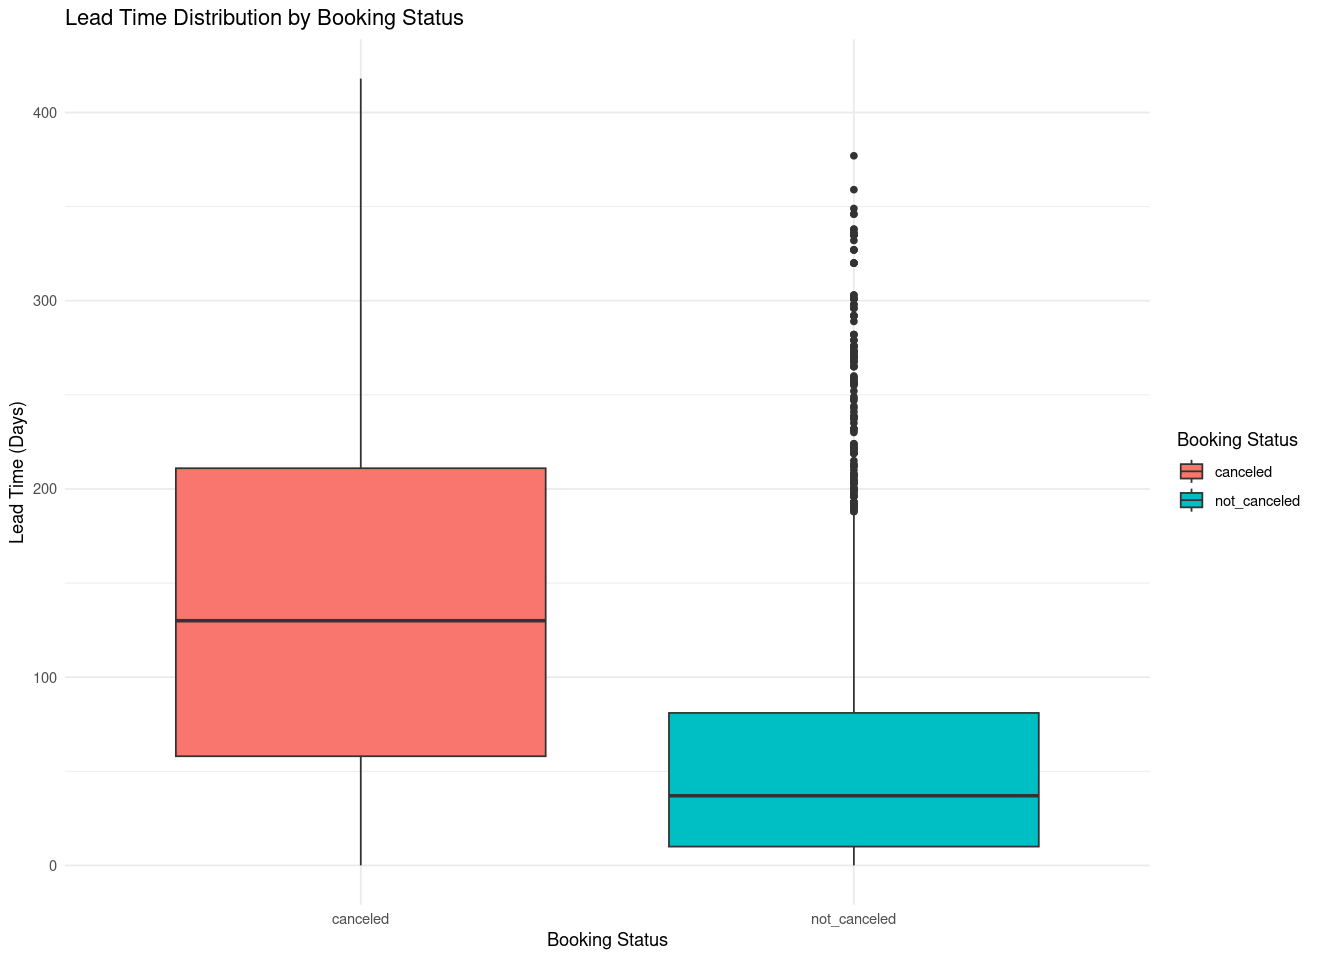

In [89]:
lead_time_plot <- ggplot(bookings_df, aes(x = booking_status, y = lead_time_days, fill = booking_status)) +
  geom_boxplot() +
  labs(title = "Lead Time Distribution by Booking Status",
       x = "Booking Status",
       y = "Lead Time (Days)",
       fill = "Booking Status") +
  theme_minimal()

lead_time_plot


## Question 2


**Question**: How does the room type affect the likelihood of a booking being canceled?



**Answer**: The reservations for suites, including suite, presidential suite, and executive suite, have a notably higher count of cancellations compared to studios. Specifically, the count of canceled bookings for suites ranges from 30 to 1573, while the count for not-canceled bookings ranges from 59 to 3106. On the other hand, studios show a lower count of cancellations, with 267 canceled bookings and 523 not-canceled bookings. These findings suggest that the room type indeed plays a role in influencing the likelihood of a booking being canceled, with suites having a higher tendency for cancellations compared to studios. 


## Supporting Analysis


In [90]:
room_type_counts <- bookings_df %>%
  group_by(booking_status, room_type) %>%
  summarise(count = n()) %>%
  pivot_wider(names_from = booking_status, values_from = count, values_fill = 0)

room_type_counts


`summarise()` has grouped output by 'booking_status'. You can override using
the `.groups` argument.


room_type,canceled,not_canceled
<fct>,<int>,<int>
studio,267,523
suite,1573,3106
presidential_suite,30,59
executive_suite,85,82


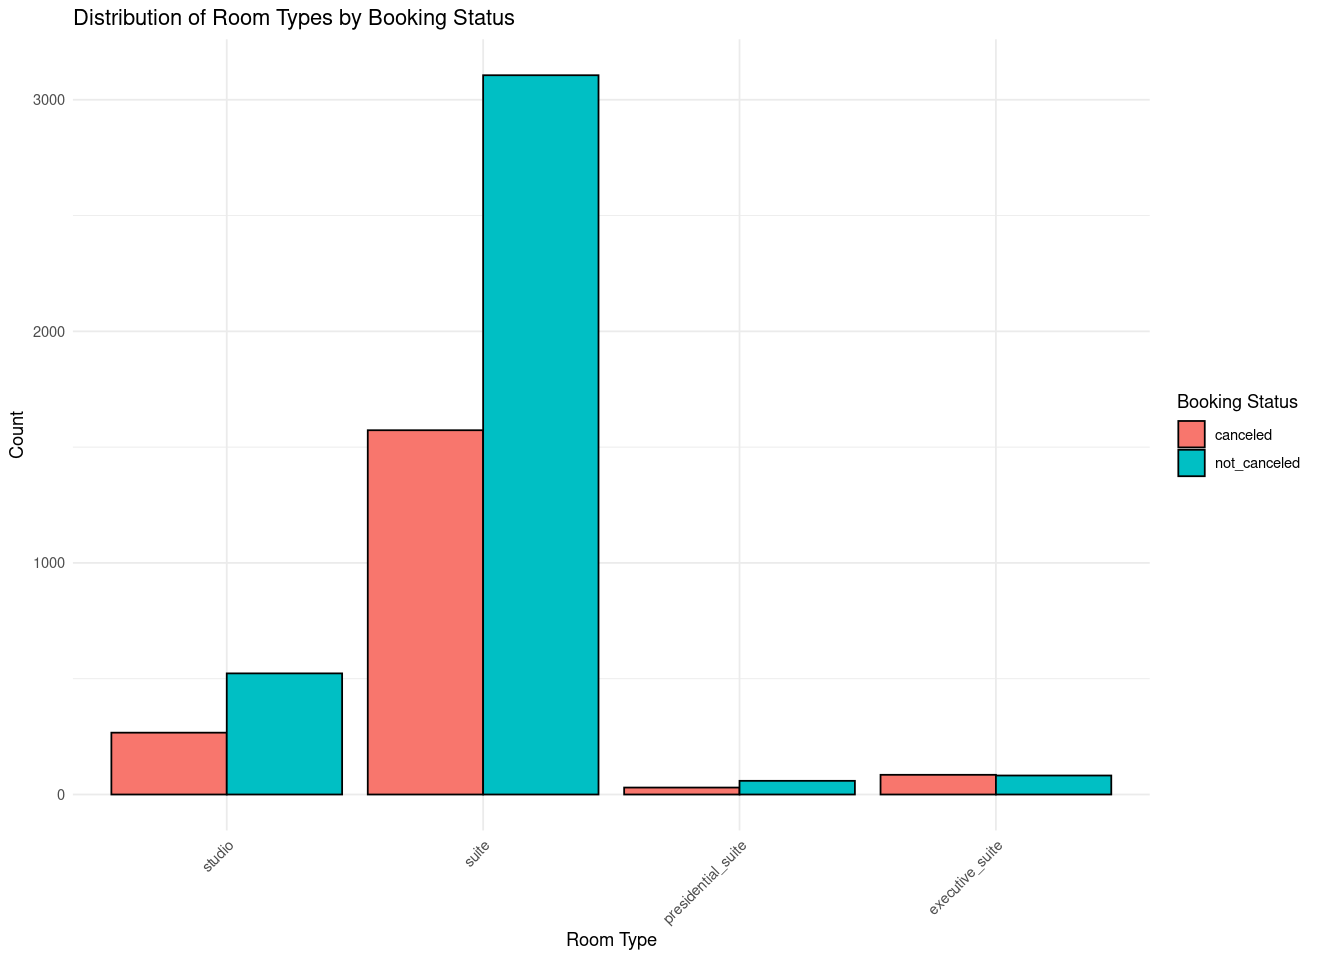

In [91]:
library(ggplot2)

room_type_plot <- ggplot(bookings_df, aes(x = room_type, fill = booking_status)) +
  geom_bar(position = "dodge", color = "black") +  # Use position = "dodge" for grouped bars
  labs(title = "Distribution of Room Types by Booking Status",
       x = "Room Type",
       y = "Count",
       fill = "Booking Status") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

room_type_plot



## Question 3


**Question**: Does the number of special requests influence the likelihood of a booking being canceled?



**Answer**: Yes. On average, canceled bookings tend to have fewer special requests, with a mean of approximately 0.34 special requests and a median of 0 requests. In contrast, not-canceled bookings have a higher average number of special requests, with a mean of approximately 0.77 special requests and a median of 1 request. This suggests that there is a relationship between the number of special requests and the likelihood of a booking being canceled. Bookings with fewer special requests are more likely to be canceled, while bookings with more special requests are less likely to be canceled.  


## Supporting Analysis


In [24]:
special_requests_summary <- bookings_df %>%
  group_by(booking_status) %>%
  summarise(mean_special_requests = mean(special_requests),
            median_special_requests = median(special_requests))

special_requests_summary


booking_status,mean_special_requests,median_special_requests
<fct>,<dbl>,<dbl>
canceled,0.3360614,0
not_canceled,0.7676393,1


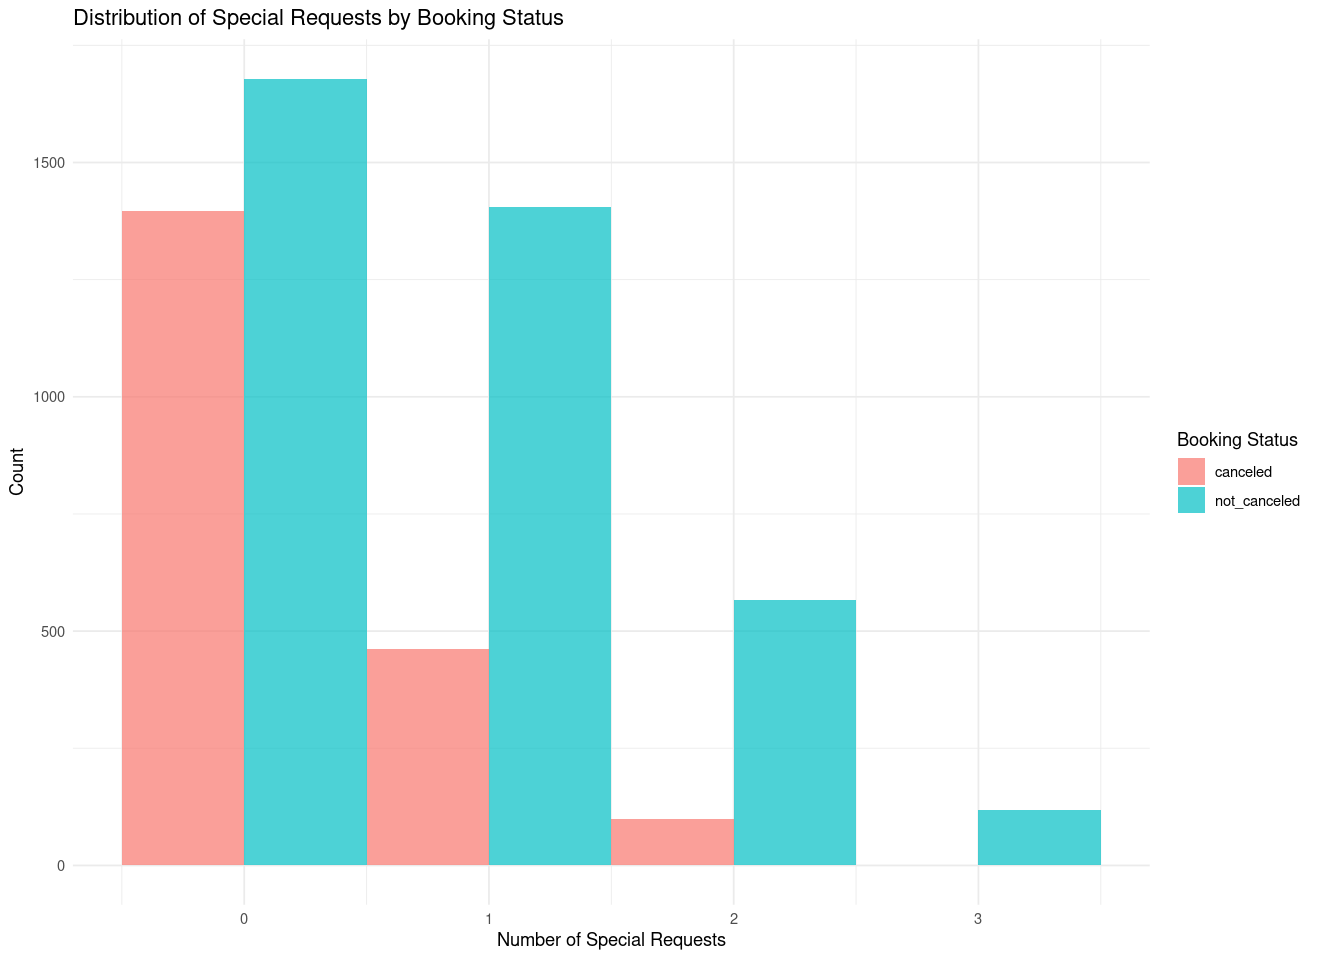

In [29]:
special_requests_plot <- ggplot(bookings_df, aes(x = special_requests, fill = booking_status)) +
  geom_histogram(binwidth = 1, position = "dodge", alpha = 0.7) +
  labs(title = "Distribution of Special Requests by Booking Status",
       x = "Number of Special Requests",
       y = "Count",
       fill = "Booking Status") +
  theme_minimal()

special_requests_plot


## Question 4


**Question**: Is there a difference in the distribution of booking lead times between different types of booking channels (e.g., online, mobile app, travel agency)?



**Answer**: Yes. The analysis of lead times across different booking channels shows distinct distributions. Bookings made through corporate partners have the shortest lead times (mean ≈ 21.58 days), while those made via the mobile app have the longest lead times (mean ≈ 105.97 days). Online bookings fall in between (mean ≈ 69.26 days), and bookings through travel agencies have a moderate lead time (mean ≈ 79.84 days). These differences suggest varying booking behaviors and processes across channels, highlighting the importance of tailored strategies for each channel to optimize lead time management and customer engagement.


## Supporting Analysis


In [34]:
library(dplyr)

# Calculate summary statistics for lead times by booking channel
summary_stats <- bookings_df %>%
  group_by(booking_type) %>%
  summarise(mean_lead_time = mean(lead_time_days, na.rm = TRUE),
            median_lead_time = median(lead_time_days, na.rm = TRUE),
            sd_lead_time = sd(lead_time_days, na.rm = TRUE),
            min_lead_time = min(lead_time_days, na.rm = TRUE),
            max_lead_time = max(lead_time_days, na.rm = TRUE))

summary_stats


booking_type,mean_lead_time,median_lead_time,sd_lead_time,min_lead_time,max_lead_time
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
online,69.25789,48,68.25943,0,293
mobile_app,105.96799,80,83.78909,0,292
corporate_partner,21.58219,7,30.77962,0,113
travel_agency,79.83534,57,73.99232,0,290


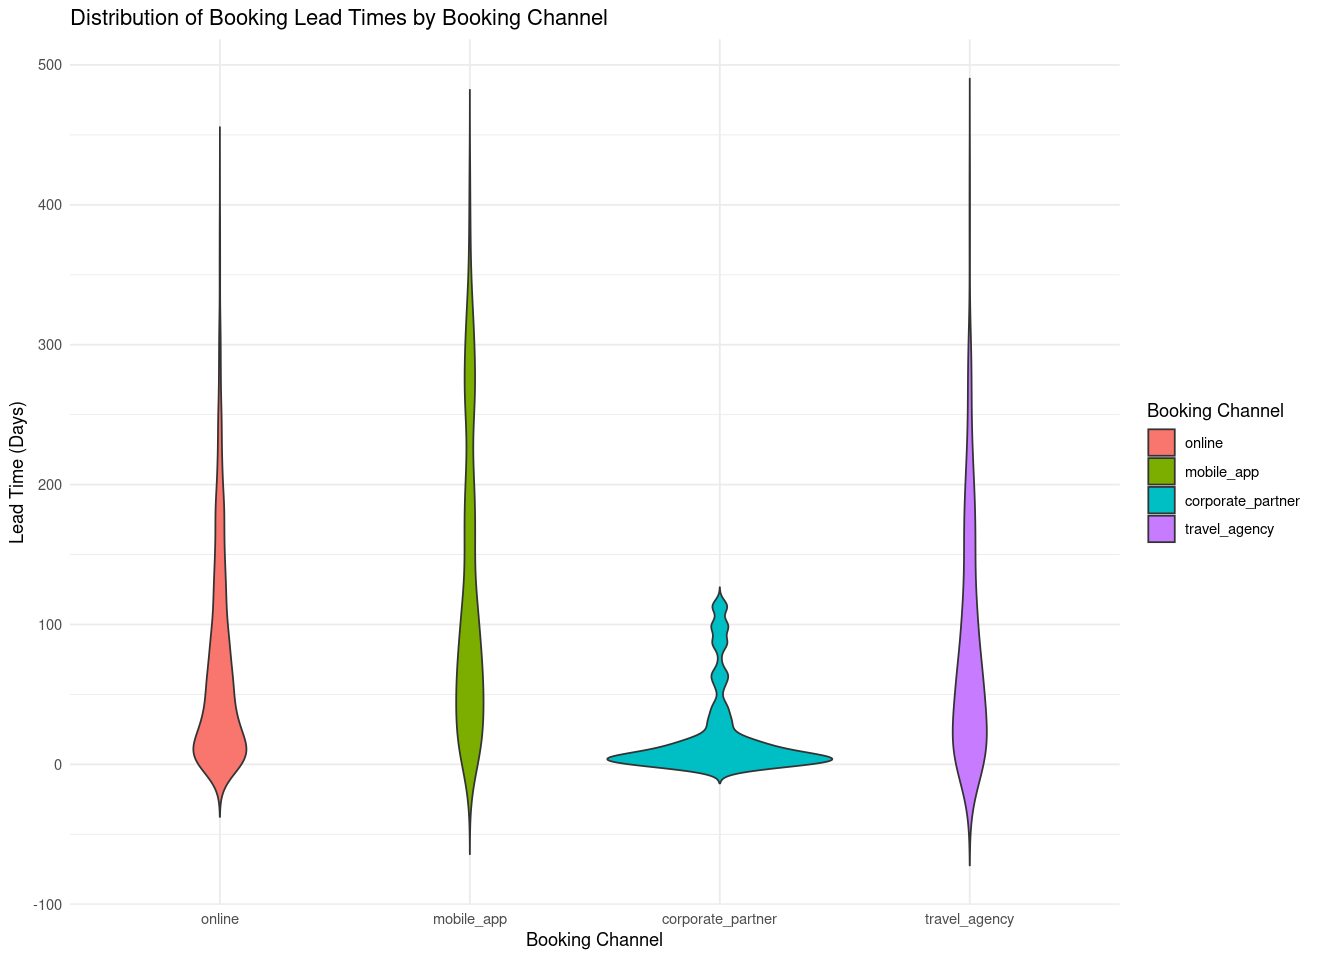

In [117]:
# Create a violin plot of lead times by booking channel
lead_time_violin <- ggplot(bookings_df, aes(x = booking_type, y = lead_time_days, fill = booking_type)) +
  geom_violin(trim = FALSE) +
  labs(title = "Distribution of Booking Lead Times by Booking Channel",
       x = "Booking Channel",
       y = "Lead Time (Days)",
       fill = "Booking Channel") +
  theme_minimal()

lead_time_violin


## Question 5


**Question**: How does the season of arrival occupancy affect the likelihood of booking cancellation?



**Answer**: Yes. Cancellation proportions vary significantly across different seasons of arrival occupancy. During low occupancy periods, the proportion of canceled bookings is approximately 20.05%, while it increases to about 34.48% during moderate occupancy periods. The highest cancellation proportion of around 43.63% is observed during peak occupancy periods. 



## Supporting Analysis


In [36]:
library(dplyr)

# Calculate the cancellation proportion for each season
season_cancel_summary <- bookings_df %>%
  group_by(arrival_occupancy_season) %>%
  summarise(total_bookings = n(),
            canceled_bookings = sum(booking_status == "canceled"),
            cancel_prop = canceled_bookings / total_bookings)

season_cancel_summary


arrival_occupancy_season,total_bookings,canceled_bookings,cancel_prop
<fct>,<int>,<int>,<dbl>
low,1147,230,0.2005231
moderate,2976,1026,0.3447581
peak,1602,699,0.4363296


`summarise()` has grouped output by 'arrival_occupancy_season'. You can
override using the `.groups` argument.


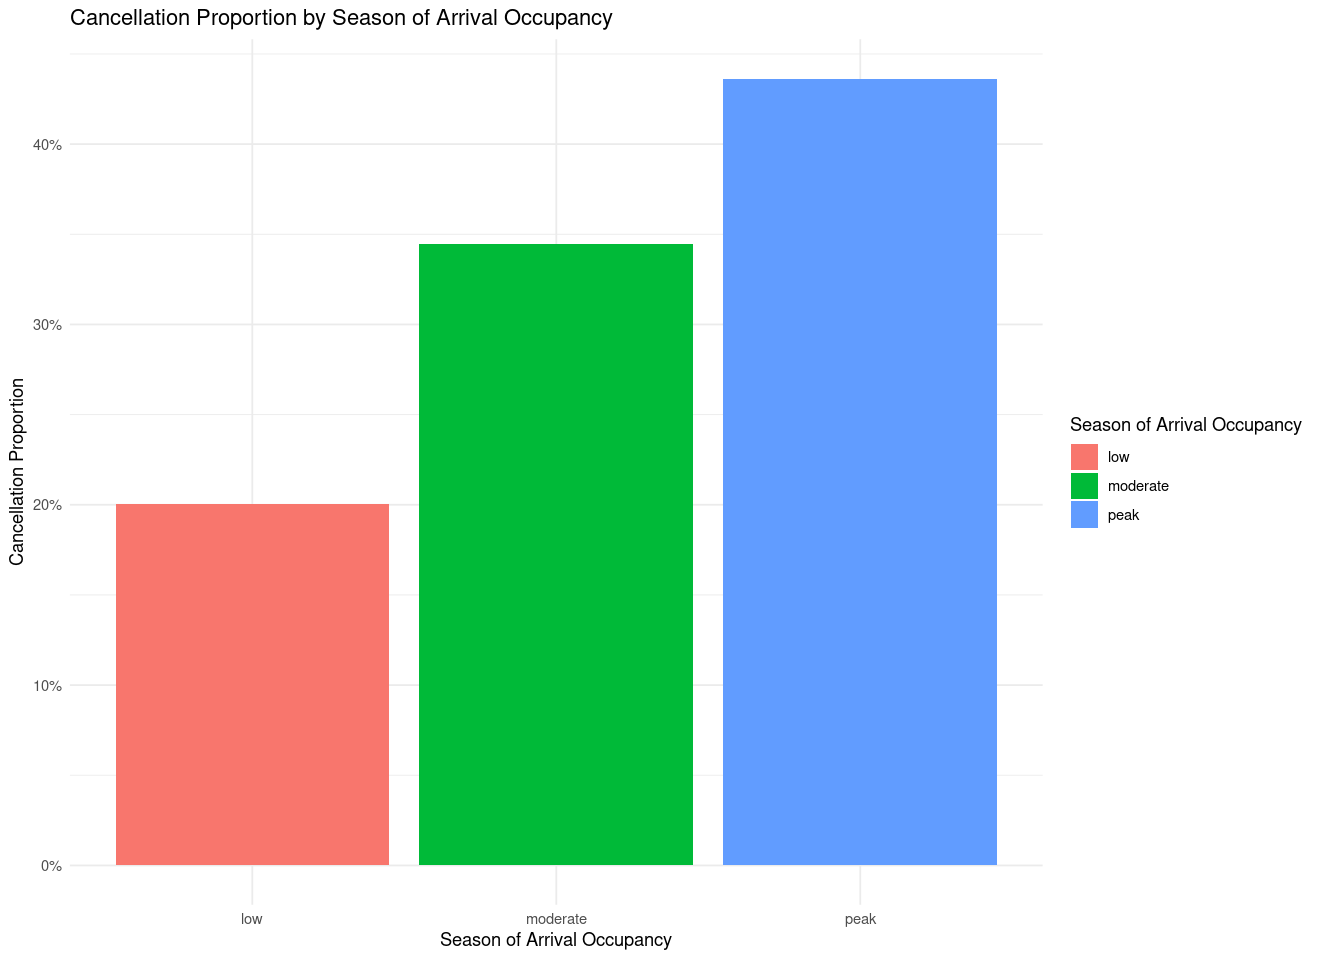

In [35]:
library(ggplot2)

# Calculate the proportion of canceled bookings for each season
season_cancel_prop <- bookings_df %>%
  group_by(arrival_occupancy_season, booking_status) %>%
  summarise(count = n()) %>%
  pivot_wider(names_from = booking_status, values_from = count) %>%
  mutate(cancel_prop = canceled / (canceled + not_canceled))

# Create a bar plot of cancellation proportion by season
season_cancel_plot <- ggplot(season_cancel_prop, aes(x = arrival_occupancy_season, y = cancel_prop, fill = arrival_occupancy_season)) +
  geom_bar(stat = "identity") +
  labs(title = "Cancellation Proportion by Season of Arrival Occupancy",
       x = "Season of Arrival Occupancy",
       y = "Cancellation Proportion",
       fill = "Season of Arrival Occupancy") +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +  # Format y-axis as percentage
  theme_minimal()

season_cancel_plot


# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`booking_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `bookings_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [37]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/vip_0.4.1.tar.gz' ...
	OK [downloaded 2.4 Mb in 0.5 secs]
Installing vip [0.4.1] ...
	OK [installed binary]
Moving vip [0.4.1] into the cache ...
	OK [moved to cache in 0.37 milliseconds]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [92]:
library(tidymodels)
library(vip)

In [93]:
set.seed(123)

bookings_split <- initial_split(bookings_df, prop = 0.75,strata = booking_status)

bookings_training <- bookings_split %>% training()

bookings_test <- bookings_split %>% testing()

nrow(bookings_training)
nrow(bookings_test)

[1] 4293

[1] 1432

In [94]:
bookings_folds <- vfold_cv(bookings_training, v = 5)

## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [59]:
bookings_recipe <- recipe(booking_status ~ ., data = bookings_training) %>% 
                 step_corr(all_numeric(),threshold = 0.8) %>% 
                 step_normalize(all_numeric(), -all_outcomes()) %>% 
                 step_dummy(all_nominal(), -all_outcomes())



In [60]:
bookings_recipe %>% 
  prep(training = bookings_training) %>% 
  bake(new_data = NULL)

previous_cancellations,previous_non_canceled_bookings,adults,children,weekend_nights,week_nights,room_price,special_requests,reserved_parking_space,lead_time_days,⋯,booking_type_mobile_app,booking_type_corporate_partner,booking_type_travel_agency,meal_plan_american,meal_plan_modified_american,room_type_suite,room_type_presidential_suite,room_type_executive_suite,arrival_occupancy_season_moderate,arrival_occupancy_season_peak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.08543946,-0.1161493,0.5193071,-0.2829767,0.2657610,-0.78754087,0.65819996,-0.8043438,-0.5459725,0.16391383,⋯,0,0,0,0,0,1,0,0,1,0
-0.08543946,-0.1161493,0.5193071,-0.2829767,-0.8808843,-0.78754087,-0.79986774,-0.8043438,-0.5459725,0.83679360,⋯,0,0,0,1,0,1,0,0,0,1
-0.08543946,-0.1161493,0.5193071,-0.2829767,0.2657610,-0.08987002,-1.16966752,-0.8043438,-0.5459725,NA,⋯,0,0,0,0,0,1,0,0,1,0
-0.08543946,-0.1161493,0.5193071,-0.2829767,-0.8808843,0.60780084,1.87079105,0.5046206,-0.5459725,-0.52242352,⋯,0,0,0,0,0,0,0,0,1,0
-0.08543946,-0.1161493,0.5193071,-0.2829767,0.2657610,-0.08987002,0.05595461,-0.8043438,-0.5459725,1.50967336,⋯,0,0,0,0,0,0,0,0,1,0
-0.08543946,-0.1161493,0.5193071,-0.2829767,-0.8808843,-0.08987002,-1.02879141,-0.8043438,-0.5459725,-0.83194822,⋯,0,0,0,1,0,1,0,0,0,0
-0.08543946,-0.1161493,0.5193071,-0.2829767,-0.8808843,-0.78754087,2.03526390,0.5046206,-0.5459725,-0.77811784,⋯,0,0,0,0,0,0,0,0,0,1
-0.08543946,-0.1161493,0.5193071,-0.2829767,0.2657610,-0.08987002,0.37292585,-0.8043438,-0.5459725,0.94445436,⋯,0,0,0,0,0,0,0,0,0,1
-0.08543946,-0.1161493,0.5193071,-0.2829767,-0.8808843,-0.08987002,0.23909355,0.5046206,-0.5459725,NA,⋯,1,0,0,0,1,1,0,0,0,1


## Model 1 Training

In [95]:
library(recipes)
library(yardstick)

In [96]:
#  Logistic Regression Model
logistic_model <- logistic_reg() %>% 
                  set_engine('glm') %>% 
                  set_mode('classification')

# Workflow
logistic_wf <- workflow() %>% 
               add_model(logistic_model) %>% 
               add_recipe(bookings_recipe)
# Fit Model
logistic_fit1 <- logistic_wf %>% 
                fit(data = bookings_training)

In [97]:
# Collect Predictions

#Obtain class predictions
class_preds<-predict(logistic_fit1,new_data = bookings_test,type = "class")

#Obtain estimated probabilities
prob_preds<-predict(logistic_fit1,new_data = bookings_test,type = "prob")

#Combine test set results
bookings_results <- bookings_test %>% 
  dplyr::select(booking_status) %>% 
  bind_cols(class_preds, prob_preds)

bookings_results

booking_status,.pred_class,.pred_canceled,.pred_not_canceled
<fct>,<fct>,<dbl>,<dbl>
canceled,canceled,0.877512196,0.12248780
not_canceled,not_canceled,0.032466158,0.96753384
not_canceled,not_canceled,0.387600408,0.61239959
not_canceled,not_canceled,0.029870470,0.97012953
canceled,not_canceled,0.279521986,0.72047801
not_canceled,not_canceled,0.006977374,0.99302263
not_canceled,not_canceled,0.122570621,0.87742938
not_canceled,not_canceled,0.314487687,0.68551231
canceled,not_canceled,0.393927697,0.60607230


## Model 1 Performance Evaluation

In [99]:
# Define metrics for evaluation
model_metrics <- metric_set(accuracy, f_meas, roc_auc)

# Train the model on the training data
last_fit_model1 <- logistic_wf %>% 
                   last_fit(split = bookings_split, metrics = model_metrics)

# Collect model evaluation metrics
model1_metrics <- last_fit_model1 %>% 
                  collect_metrics()

# Collect predictions on the test data
model1_pred <- last_fit_model1 %>% 
               collect_predictions()

# Print the evaluation metrics
model1_metrics

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8191341,Preprocessor1_Model1
f_meas,binary,0.7193933,Preprocessor1_Model1
roc_auc,binary,0.8849449,Preprocessor1_Model1


In [100]:
# custom metrics function
bookings_metrics <- metric_set( sens)

bookings_metrics(bookings_results, 
           truth = booking_status, 
           estimate = .pred_class,
           .pred_canceled)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
sens,binary,0.6789366


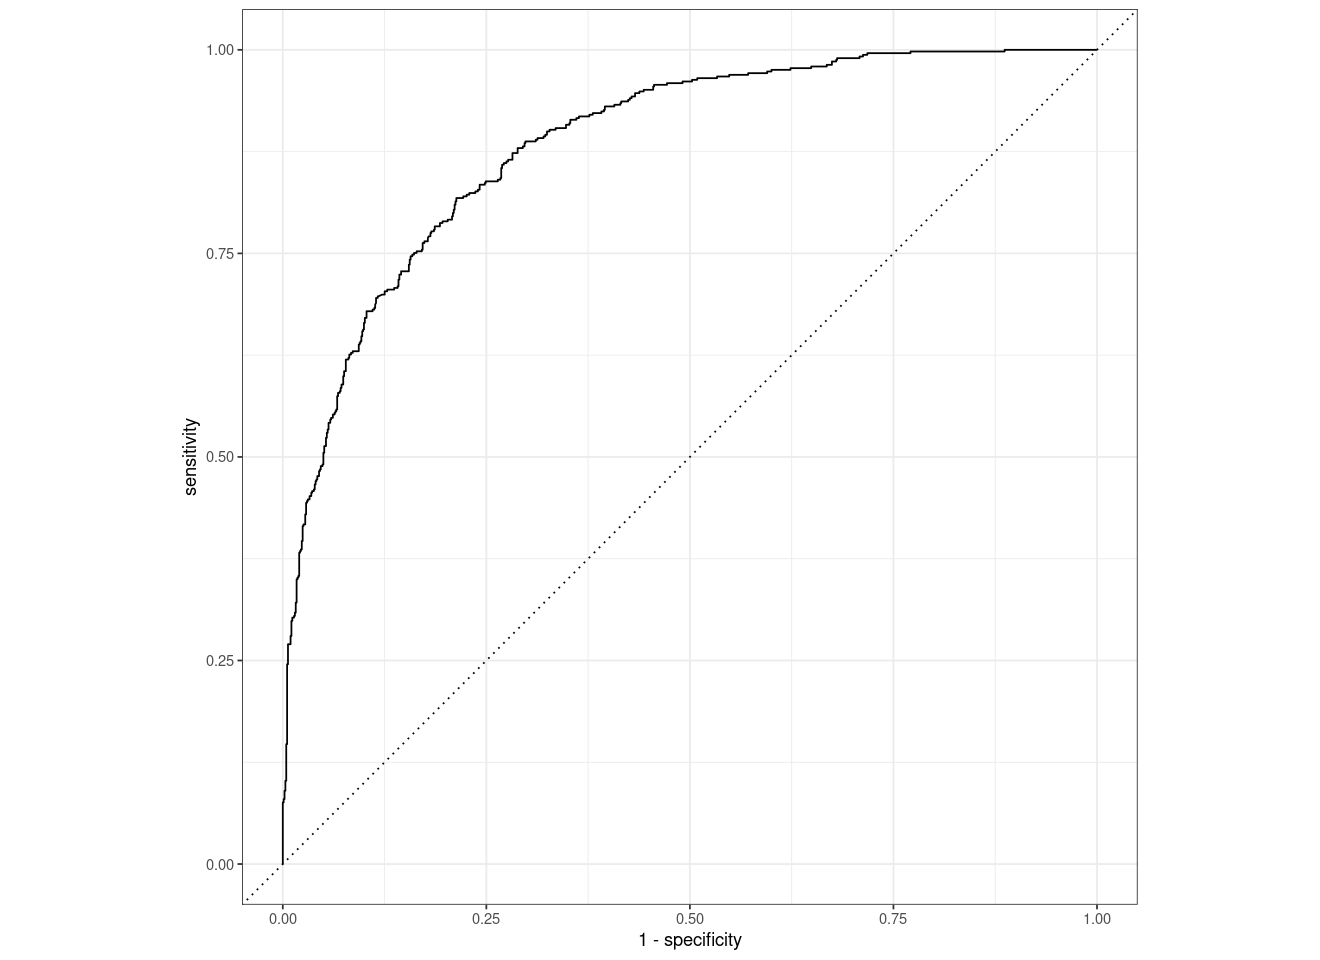

In [121]:
# Create a ROC curve plot
roc_curve(bookings_results, truth = booking_status, .pred_canceled) %>%
  autoplot()

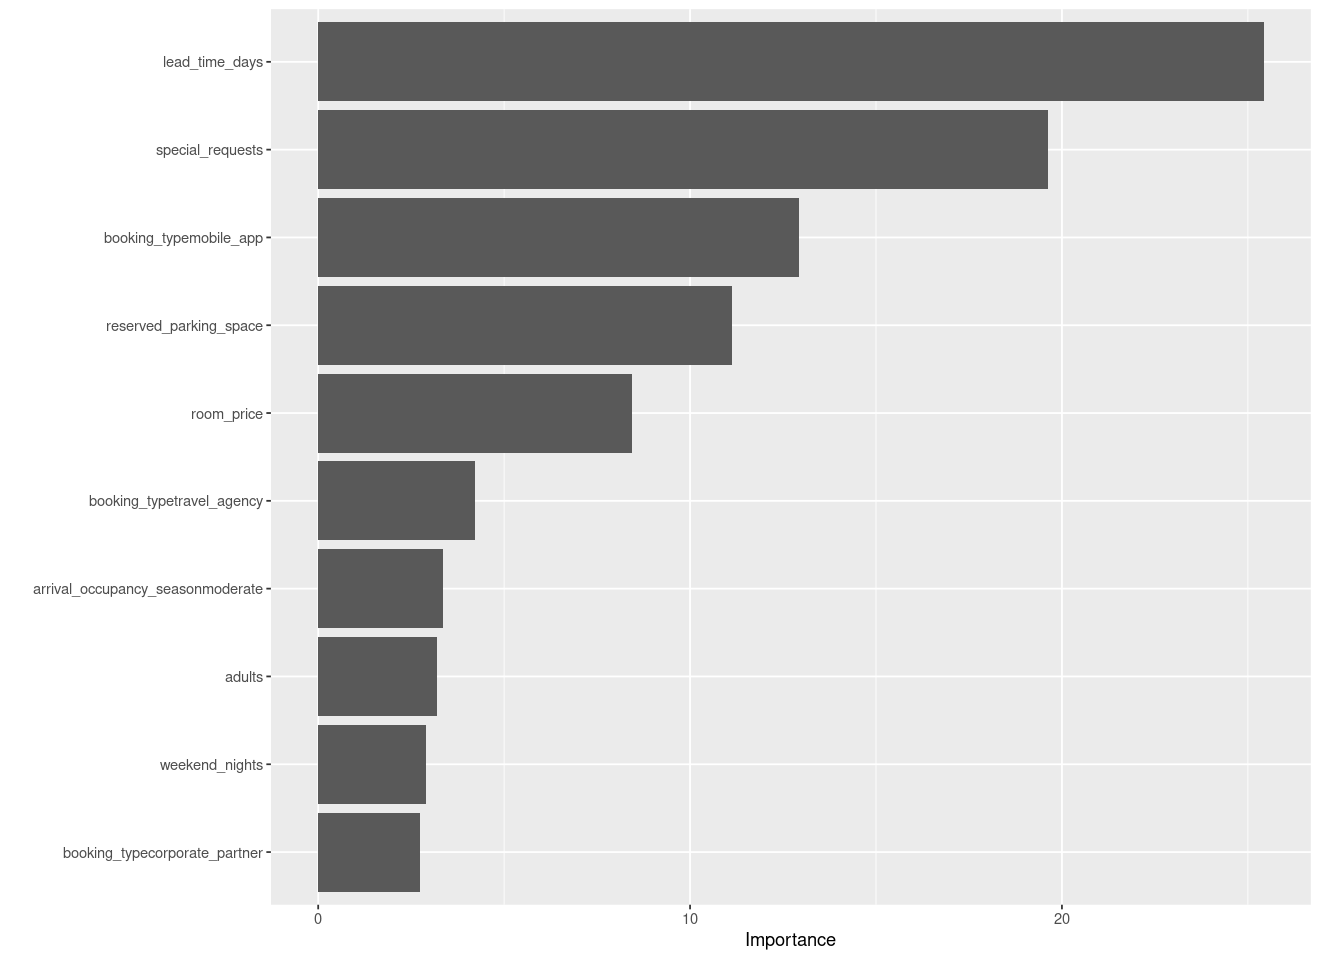

In [103]:
#Variable importance Plot for Model1.
# Load the 'vip' package
library(vip)

# Create a variable importance plot for the Logistic Regression model
vip(logistic_fit1)


In [104]:
model <- glm( booking_status ~., data = bookings_training, family = binomial)
tidymodel <- tidy(model)
summary(model)



Call:
glm(formula = booking_status ~ ., family = binomial, data = bookings_training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5775  -0.5867   0.3080   0.6553   2.8458  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       3.6460035  0.3634762  10.031  < 2e-16 ***
booking_typemobile_app            1.6771416  0.1298469  12.916  < 2e-16 ***
booking_typecorporate_partner     0.6938416  0.2526126   2.747 0.006020 ** 
booking_typetravel_agency         0.8984242  0.2133482   4.211 2.54e-05 ***
previous_cancellations            0.7817006  0.5890123   1.327 0.184463    
previous_non_canceled_bookings    0.2246172  0.2075344   1.082 0.279113    
adults                           -0.3579665  0.1122558  -3.189 0.001428 ** 
children                         -0.2122448  0.1582167  -1.341 0.179764    
weekend_nights                   -0.1408567  0.0486788  -2.894 0.003809 ** 
week_nights              

## Model 2 Training

In [107]:
library(tidymodels)

# set seed for reproducibility
set.seed(123)

# split data into training and test sets
bookings_split <- initial_split(bookings_df, prop = 0.7, strata = booking_status)

bookings_train <- training(bookings_split)
bookings_test <- testing(bookings_split)

# create recipe
bookings_recipe <- recipe(booking_status ~ ., data = bookings_train) %>%
  step_normalize(all_numeric(), -all_outcomes())

# create 5 folds for cross-validation
bookings_folds <- vfold_cv(bookings_train, v = 5, strata = booking_status)

# create model specification
model_2 <- nearest_neighbor(neighbors = tune()) %>% 
  set_engine('kknn') %>% 
  set_mode('classification')

# create workflow
workflow_2 <- workflow() %>% 
  add_model(model_2) %>% 
  add_recipe(bookings_recipe)

In [108]:
#Tuning the model
# Hyperparameter Tuning
model2_grid <- tibble(neighbors = c(5, 15, 25, 35, 45, 55))

set.seed(300)

model2_tuning <- workflow_2 %>%
  tune_grid(
    resamples = bookings_folds,
    grid = model2_grid,
    metrics = metric_set(roc_auc)
  )

best_model <- model2_tuning %>%
  select_best(metric = 'roc_auc')

final_workflow2 <- workflow_2 %>%
  finalize_workflow(best_model)


In [109]:
#Fit the model
last_fit_model2 <- final_workflow2 %>%
  last_fit(
    split = bookings_split,
    metrics = metric_set(
      accuracy,
      kap,
      roc_auc,

    )
  )

## Model 2 Performance Evaluation

In [110]:
# Evaluation
model2_metrics <- last_fit_model2 %>% 
  collect_metrics()

model2_pred <- last_fit_model2 %>% 
  collect_predictions()

model2_metrics

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8195576,Preprocessor1_Model1
kap,binary,0.5831879,Preprocessor1_Model1
roc_auc,binary,0.8858053,Preprocessor1_Model1


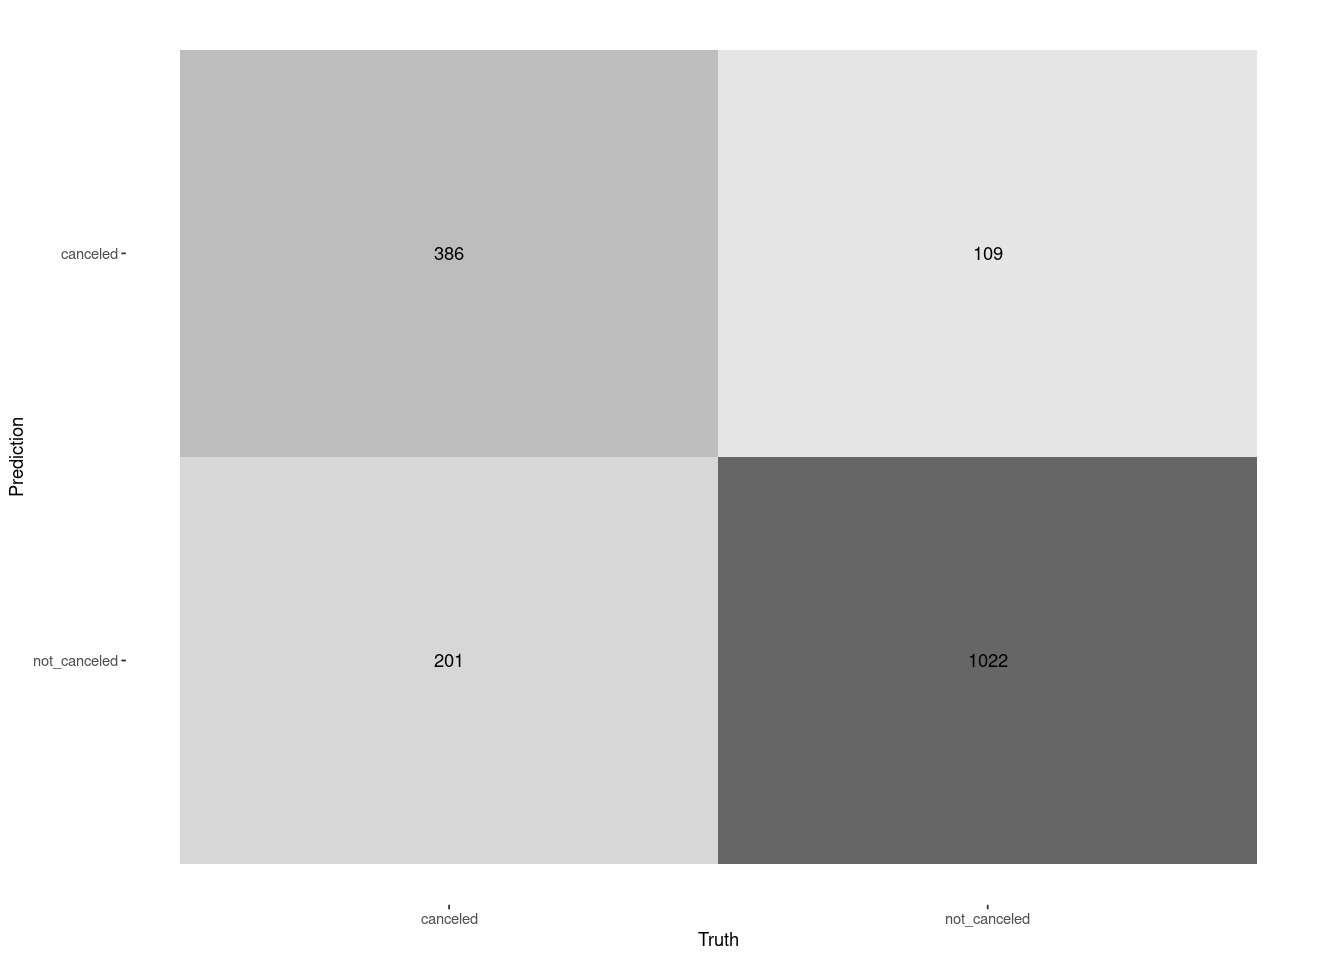

In [111]:
conf_mat(model2_pred, truth = booking_status, estimate = .pred_class) %>%
  autoplot(type='heatmap')

Installing pROC [1.18.5] ...
	OK [linked cache]


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



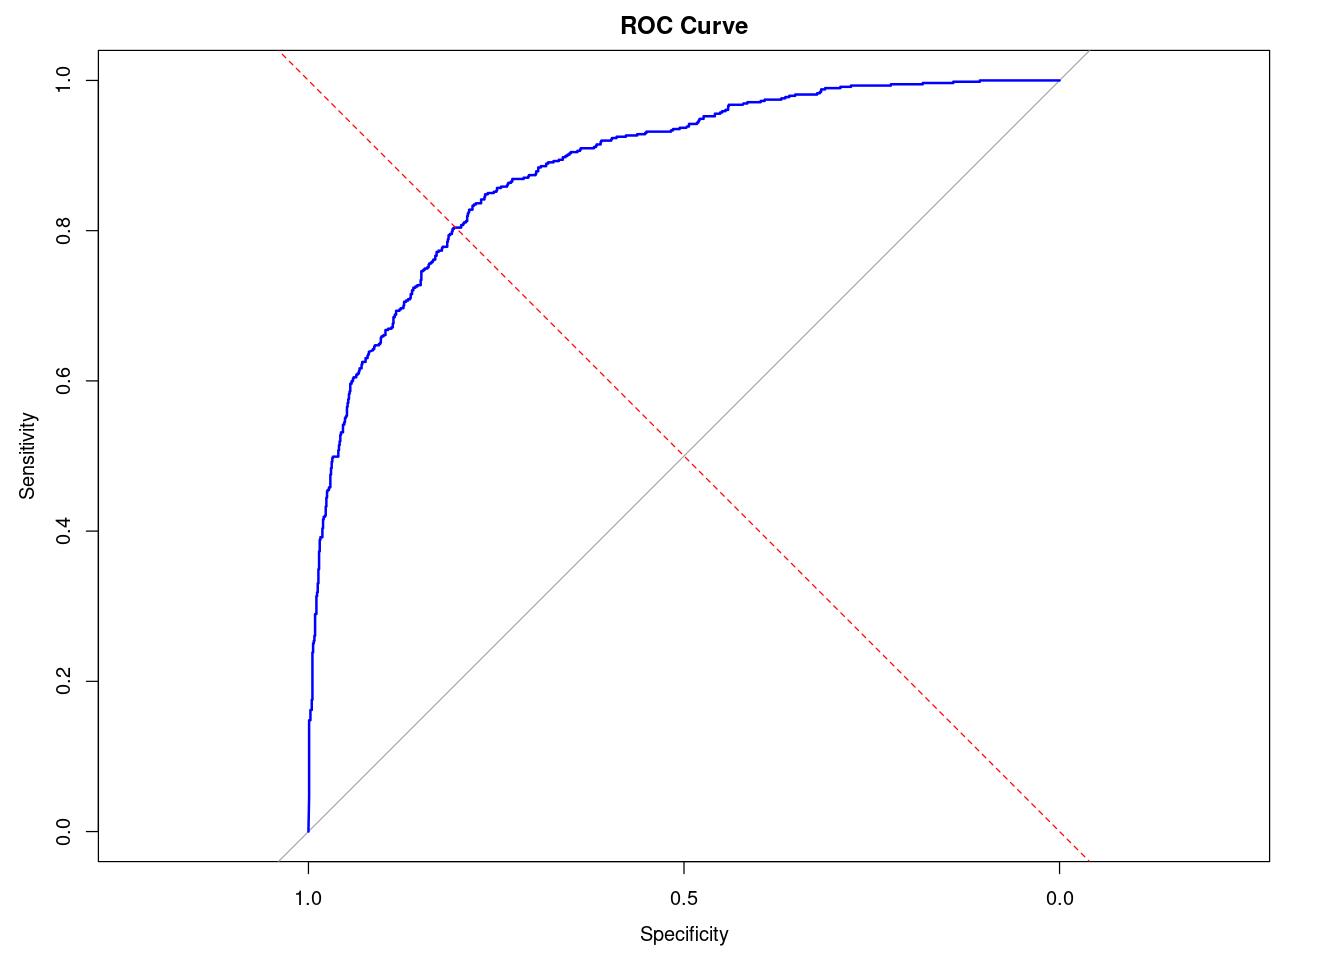

In [112]:


# Install the pROC package if not already installed
install.packages("pROC")

# Load the pROC library
library(pROC)

# Extract the predicted probabilities and true labels
predictions <- model2_pred$.pred_canceled
labels <- ifelse(model2_pred$booking_status == "canceled", 1, 0)

# Create a ROC curve
roc_curve <- roc(labels, predictions)

# Plot the ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")
abline(a = 0, b = 1, lty = 2, col = "red")




## Model 3 Training

In [113]:
# Random Forest Model
rf_model <- rand_forest() %>%
  set_engine("ranger", importance = "permutation", num.threads = 1) %>%
  set_mode("classification")

# Workflow
rf_wf <- workflow() %>%
  add_model(rf_model) %>%
  add_recipe(bookings_recipe)

# Fit Model
rf_fit <- rf_wf %>%
  last_fit(split = bookings_split)

In [114]:
# Collect Predictions
rf_results <- rf_fit %>%
  collect_predictions()

## Model 3 Performance Evaluation

In [115]:
# Define a set of evaluation metrics
rf_metrics <- metric_set(accuracy, f_meas, roc_auc)

# Calculate and display the evaluation metrics
rf_metrics(rf_results,
           truth = booking_status,
           estimate = .pred_class,
		  .pred_canceled)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8725262
f_meas,binary,0.7985281
roc_auc,binary,0.9262747


Installing pROC [1.18.5] ...
	OK [linked cache]


Setting levels: control = 0, case = 1

Setting direction: controls < cases



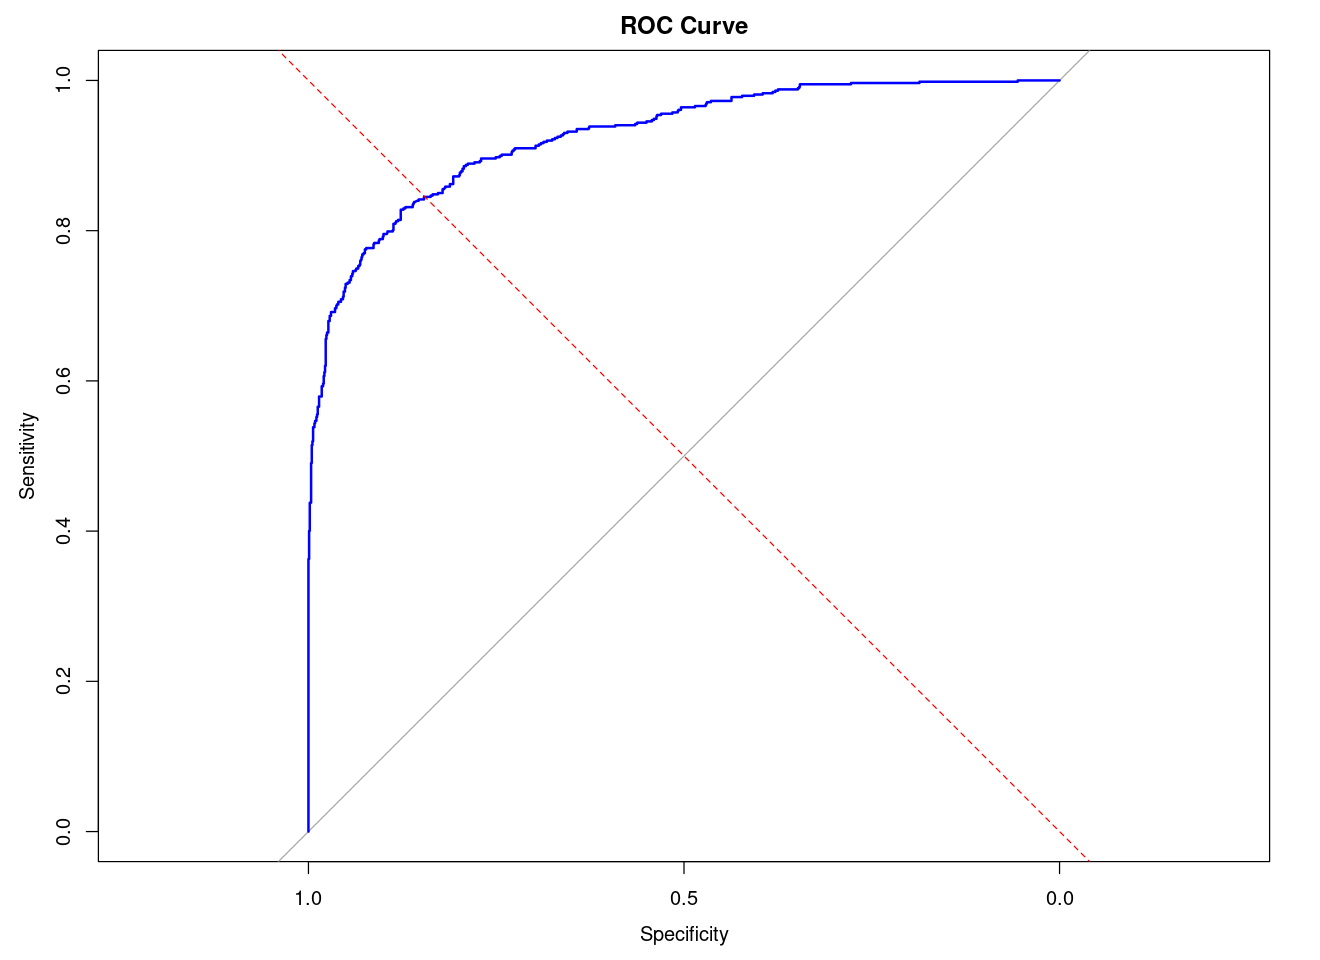

In [116]:
# Install the pROC package if not already installed
install.packages("pROC")

# Load the pROC library
library(pROC)

# Extract the predicted probabilities and true labels
predictions <- rf_results$.pred_canceled
labels <- ifelse(rf_results$booking_status == "canceled", 1, 0)

# Create a ROC curve
roc_curve <- roc(labels, predictions)

# Plot the ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")
abline(a = 0, b = 1, lty = 2, col = "red")


# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the hotel. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and services at the hotel.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a hotel with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

In today's fiercely competitive hotel industry, customer retention poses a significant challenge. Establishing lasting connections with clients and minimizing reservation cancellations are essential for sustained success. To address this challenge, my data analysis aims to identify the primary factors influencing reservation cancellations. The goal is to provide actionable insights and recommendations to enhance customer retention and service quality.



## Key Findings

Lead time: Customers who cancel reservations have significantly longer lead times compared to those who do not cancel, indicating advanced planning for canceled bookings.

Room type: Suites, including presidential and executive suites, have higher cancellation rates compared to studios, suggesting a correlation between room type and cancellation likelihood.

Special requests: Bookings with fewer special requests are more likely to be canceled, highlighting the impact of customer preferences on cancellation probabilities.

Booking channels: Lead times vary across different booking channels, with corporate partners having the shortest lead times and mobile apps having the longest, emphasizing the need for tailored strategies for each channel.

Seasonal occupancy: Cancellation proportions vary significantly based on the season of arrival occupancy, with higher cancellation rates observed during peak occupancy periods, underscoring the influence of seasonal demand on cancellation likelihood.


## Modeling Results

After conducting thorough data analysis, I've identified key factors that significantly influence the decision to cancel a reservation. Specifically, the lead time of guests, types of special requests, and utilization of parking facilities emerged as significant variables. These findings underscore the importance of personalized customer experiences tailored to booking specifics.

In terms of classifier performance, three models—Logistic Regression, k-Nearest Neighbors (KNN), and Random Forest—were meticulously developed and closely evaluated. Among them, the Random Forest model emerged as the top performer with an impressive ROC AUC of 0.9263, indicating its strong ability to predict future cancellations. The Random Forest model achieved an F1 Score of 0.7985 and a Sensitivity of 0.8725, further highlighting its effectiveness in classification tasks.


## Recommendations

Personalized Experience:
- Tailor marketing strategies and promotions based on lead time insights to encourage commitment and reduce cancellations.
- Implement personalized room recommendations to enhance satisfaction and minimize cancellation risks.

Efficient Special Requests Handling:
- Streamline special requests management to ensure efficient fulfillment, prioritizing customer preferences to reduce cancellation likelihood.

Channel-Specific Strategies:
- Develop targeted marketing and pricing strategies for different booking channels to optimize promotions and enhance conversion rates.

Seasonal Pricing and Promotions:
- Adjust pricing and promotional offers during peak occupancy to incentivize bookings and mitigate cancellation risks.

Customer Engagement:
- Implement customer engagement initiatives and loyalty programs tailored to customer preferences to encourage repeat bookings.

Optimized Revenue Management:
- Utilize the Random Forest model for predicting future cancellations and optimize revenue management strategies accordingly.
